In [13]:
# Importăm Pandas pentru manipulare de date tabelare (DataFrame/Series)
import pandas as pd

# Setăm opțiuni de afișare pentru a vedea mai bine tabelele în notebook (util: debugging/inspecție)
pd.set_option("display.max_columns", 100)  # arată până la 100 de coloane
pd.set_option("display.width", 100)        # lățimea maximă a liniei

# URL către datasetul Titanic (CSV public)
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

# Citim CSV-ul într-un DataFrame (tabel Pandas)
df = pd.read_csv(url)

# Vizualizăm primele 5 rânduri (sanity check)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Quality Assesment

### Cum verificăm dacă avem date care lipsesc?

df.isnull() - returnează un DataFrame cu valori True / False

In [14]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
print("Valori lipsă pe coloană:")
df.isnull().sum()

Valori lipsă pe coloană:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [16]:
df.isnull().mean()

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,0.198653
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [17]:
# procent de lipsuri
missing_percent = df.isnull().mean() * 100

print("\nProcent valori lipsă (%):")
print(missing_percent.sort_values(ascending=False))


Procent valori lipsă (%):
Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
Sex             0.000000
Parch           0.000000
SibSp           0.000000
Fare            0.000000
Ticket          0.000000
dtype: float64


## Data Processing and Cleaning

Nota: Dupa ce umplem coloana de "Age_filled" cu media, functia de mean() va da aceeasi valoare

### Completeness

In [18]:
# completăm coloana Age cu media
df["Age_filled"] = df["Age"].fillna(df["Age"].mean())

print("Medie originală:", df["Age"].mean())
print("Medie după imputare:", df["Age_filled"].mean())

Medie originală: 29.69911764705882
Medie după imputare: 29.69911764705882


In [19]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_filled
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.000000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.000000
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,29.699118
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.000000
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,2.000000
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,27.000000
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,14.000000


### Accuracy

**interval numeric**
df[“Age”].between(0, 100, inclusive=”both”)

**categorii permise**
df[“Gender”].isin([“male”, “female”, “other”])

**valori lipsă**
df[“Age”].isna()
df[“Age”].notna()

**valori unice**
df[“Gender”].unique()
df[“Gender”].nunique()

**duplicate**
df[“Id”].duplicated()

**condiții personalizate**
(df["Salary"] > 0) & (df["Salary"] < 5000)

bad_rows = ~df["Age"].between(0, 100) | df["Salary"].isna()


#### Ce condiții ar trebui să punem ca să validăm coloana de:
- Age,
- Fare,
- Pclass,
- Survived,
- Embarked,
- PassengerId

In [20]:
# exemplu pentru Age - Validăm că vârsta este între 0 și 100, și că nu avem valori de NaN
bad_age      = ~df["Age"].between(0, 100, inclusive="both") & df["Age"].notna()
bad_fare     = df["Fare"].fillna(0) < 0
bad_pclass   = ~df["Pclass"].isin([1, 2, 3])
bad_surv     = ~df["Survived"].isin([0, 1])
bad_embarked = df["Embarked"].notna() & ~df["Embarked"].isin(["C", "Q", "S"])
dup_pid      = df["PassengerId"].duplicated(keep=False)

# Raport scurt
report = {
    "Age out of [0,100]": bad_age.sum(),
    "Fare < 0": bad_fare.sum(),
    "Pclass not in {1,2,3}": bad_pclass.sum(),
    "Survived not in {0,1}": bad_surv.sum(),
    "Embarked not in {C,Q,S}": bad_embarked.sum(),
    "Duplicate PassengerId": dup_pid.sum()
}
print(pd.Series(report))



Age out of [0,100]         0
Fare < 0                   0
Pclass not in {1,2,3}      0
Survived not in {0,1}      0
Embarked not in {C,Q,S}    0
Duplicate PassengerId      0
dtype: int64


### Consistency

In [21]:
# Introducem intenționat inconsistențe (una pentru male, una pentru female)
i_male   = df.index[df["Sex"].str.lower() == "male"][0]
i_female = df.index[df["Sex"].str.lower() == "female"][0]
df.loc[i_male,   "Sex"] = "M"          # literă mare
df.loc[i_female, "Sex"] = "  FEMALE  " # spații + caps

print("Valori unice înainte de curățare:", df["Sex"].unique())

Valori unice înainte de curățare: ['M' '  FEMALE  ' 'female' 'male']


In [22]:
# Standardizare + mapare
# - strip: scoate spații
# - lower: trece la litere mici
# - map: convertește m/f -> male/female; restul le păstrează

# 1. Convertim valorile în string
s = df["Sex"].astype("string")

# 2. Eliminăm spațiile de la început și sfârșit
s = s.str.strip()

# 3. Transformăm în litere mici
s = s.str.lower()

# 4. Mapăm valorile "m" și "f" la "male" și "female"
mapped = s.map({"m": "male", "f": "female"})

# 5. Completăm valorile nemapate cu cele originale (curățate)
df["Sex"] = mapped.fillna(s)

print("Unice după curățare:", df["Sex"].unique())


Unice după curățare: ['male' 'female']


### Scaling Features

In [23]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

# aplicăm pe coloanele numerice Age și Fare
df[["Age_minmax", "Fare_minmax"]] = scaler_minmax.fit_transform(df[["Age", "Fare"]])
df[["Age_std", "Fare_std"]] = scaler_standard.fit_transform(df[["Age", "Fare"]])

In [24]:
df[["Age", "Fare", "Age_minmax", "Fare_minmax", "Age_std", "Fare_std"]].head(30)


,Age,Fare,Age_minmax,Fare_minmax,Age_std,Fare_std
0,22.0,7.2500,0.271174,0.014151,-0.530377,-0.502445
1,38.0,71.2833,0.472229,0.139136,0.571831,0.786845
2,26.0,7.9250,0.321438,0.015469,-0.254825,-0.488854
3,35.0,53.1000,0.434531,0.103644,0.365167,0.420730
4,35.0,8.0500,0.434531,0.015713,0.365167,-0.486337
5,NaN,8.4583,NaN,0.016510,NaN,-0.478116
6,54.0,51.8625,0.673285,0.101229,1.674039,0.395814
7,2.0,21.0750,0.019854,0.041136,-1.908136,-0.224083
8,27.0,11.1333,0.334004,0.021731,-0.185937,-0.424256
9,14.0,30.0708,0.170646,0.058694,-1.081480,-0.042956


### Diferenta vizuala intre Scalare standard si scalare Min-Max

Original: valori între 0–500. Câțiva outlieri (>400) trag scara foarte sus.

Min-Max: toate valorile sunt strânse între 0–1. Outlierii apar lipiți de 1, restul sunt comprimați aproape de 0.

StandardScaler: distribuția e centrată pe 0, majoritatea între -2 și 2, dar outlierii sar la +8/+9.

In [25]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df = df.dropna(subset=["Fare"])

# scalări
minmax = MinMaxScaler()
standard = StandardScaler()

df["Fare_minmax"] = minmax.fit_transform(df[["Fare"]])
df["Fare_std"] = standard.fit_transform(df[["Fare"]])

In [26]:
# Cele mai mici valori de pe Fare și corespondenții
print(df[["Fare", "Fare_minmax", "Fare_std"]].head(10))

      Fare  Fare_minmax  Fare_std
0   7.2500     0.014151 -0.502445
1  71.2833     0.139136  0.786845
2   7.9250     0.015469 -0.488854
3  53.1000     0.103644  0.420730
4   8.0500     0.015713 -0.486337
5   8.4583     0.016510 -0.478116
6  51.8625     0.101229  0.395814
7  21.0750     0.041136 -0.224083
8  11.1333     0.021731 -0.424256
9  30.0708     0.058694 -0.042956


In [27]:
# Cele mai mari valori de pe Fare și corespondenții
print(df[["Fare", "Fare_minmax", "Fare_std"]].sort_values(by="Fare", ascending=False))

         Fare  Fare_minmax  Fare_std
679  512.3292     1.000000  9.667167
258  512.3292     1.000000  9.667167
737  512.3292     1.000000  9.667167
88   263.0000     0.513342  4.647001
438  263.0000     0.513342  4.647001
..        ...          ...       ...
806    0.0000     0.000000 -0.648422
815    0.0000     0.000000 -0.648422
466    0.0000     0.000000 -0.648422
481    0.0000     0.000000 -0.648422
822    0.0000     0.000000 -0.648422

[891 rows x 3 columns]


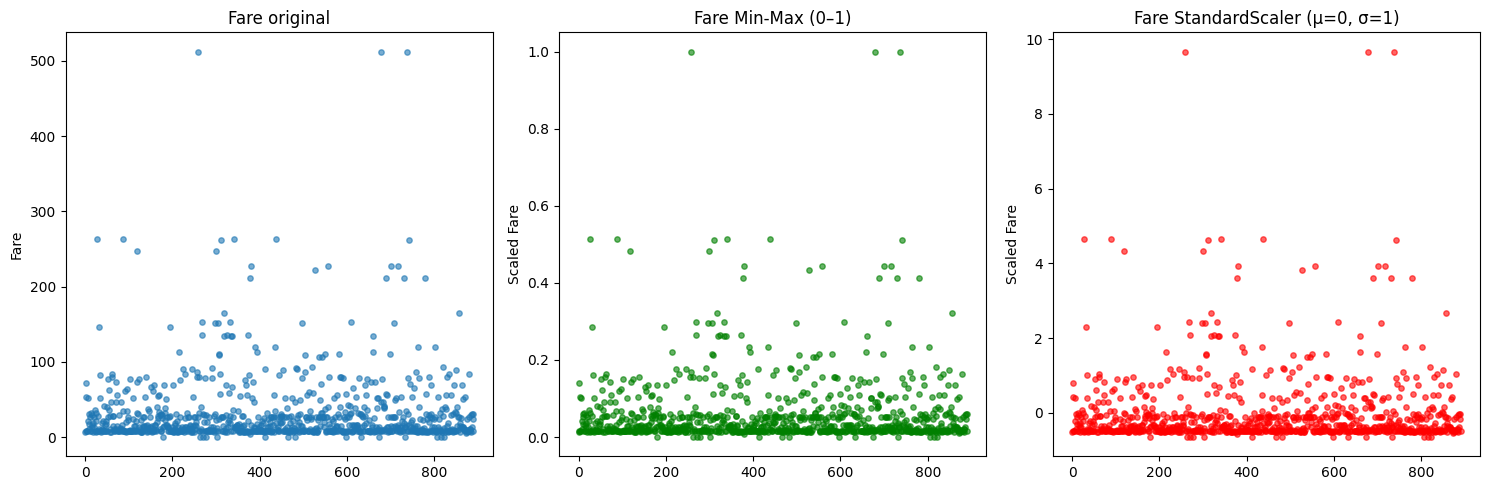

In [28]:
# scatter comparativ
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(df.index, df["Fare"], alpha=0.6, s=15)
plt.title("Fare original")
plt.ylabel("Fare")

plt.subplot(1,3,2)
plt.scatter(df.index, df["Fare_minmax"], alpha=0.6, s=15, color="green")
plt.title("Fare Min-Max (0–1)")
plt.ylabel("Scaled Fare")

plt.subplot(1,3,3)
plt.scatter(df.index, df["Fare_std"], alpha=0.6, s=15, color="red")
plt.title("Fare StandardScaler (μ=0, σ=1)")
plt.ylabel("Scaled Fare")

plt.tight_layout()
plt.show()

### Encoding Categorical Variables

In [29]:
from sklearn.preprocessing import OneHotEncoder

df = df[["Sex", "Embarked"]]

In [30]:
# Label Encoding manual

df["Sex_label"] = df["Sex"].map({"female": 0, "male": 1})
print(df[["Sex", "Sex_label"]].head())

      Sex  Sex_label
0    male          1
1  female          0
2  female          0
3  female          0
4    male          1


In [31]:
# One-Hot Encoding cu sklearn

ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore") # sparse_output = False -> returneaza matricea cu totul, handle_unknown -> ce face cu categ necunoscute care apar (le ignora, pune 0)
sex_ohe = ohe.fit_transform(df[["Sex"]])
print(sex_ohe)
sex_cols = [f"Sex_{c}" for c in ohe.categories_[0]]
df_ohe = pd.concat([df, pd.DataFrame(sex_ohe, columns=sex_cols)], axis=1)

print(df_ohe[["Sex"] + sex_cols].head())

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]
      Sex  Sex_female  Sex_male
0    male         0.0       1.0
1  female         1.0       0.0
2  female         1.0       0.0
3  female         1.0       0.0
4    male         0.0       1.0


### 📝 Exercitiu final
Scenariu: Compania la care lucrati v-a trimis un fisier cu informatii despre clienti.
Datele par "murdare" si au probleme de calitate. Nu vi se spune exact ce problema exista. Trebuie sa le descoperiti si sa le rezolvati.

Sarcina voastra:
1. **Diagnoza**: folositi info(), describe(), value_counts() si vizualizari simple pentru a identifica problemele.
*   Ce observati in date? (valori lipsa, nevalide, inconsistente etc)
2. **Plan**: Notati ce pasi de curatare ati propune si de ce (imputare, eliminare, transformare, standardizare)
3. **Implementare**: Aplicati planul in cod.
4. **Verificare**: Aratati cum arata dataset-ul dupa curatare si ce s-a schimbat fata de inceput.
5. Scrieti 2-3 fraze cu ce ati descoperit si de ce este mai bun dataset-ul acum.



In [32]:
# încărcare

import pandas as pd

FILE_ID = '1bm1cCwjyiPtacCMVKW7v_X7YYI0GaX8_'
path = f"https://drive.google.com/uc?id={FILE_ID}"

df_raw = pd.read_csv(path)
df_raw.head()

,id_client,vârstă,înălțime_cm,greutate_kg,venit,gen,oraș,segment,data_inscriere
0,1,39.0,177.9,76.8,2501.0,M,București,C,2021-06-06
1,2,55.0,164.8,55.6,2949.0,F,bUCUREȘTI,B,2019-06-03
2,3,25.0,170.2,68.7,2703 EUR,F,Cluj,A,2023-09-14
3,4,69.0,167.6,74.2,3415.0,F,NaN,B,2017-09-30
4,5,55.0,177.3,77.6,3997.0,M,Timișoara,A,2015-07-31


In [33]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_client       300 non-null    int64  
 1   vârstă          290 non-null    float64
 2   înălțime_cm     300 non-null    float64
 3   greutate_kg     300 non-null    float64
 4   venit           285 non-null    object 
 5   gen             298 non-null    object 
 6   oraș            294 non-null    object 
 7   segment         300 non-null    object 
 8   data_inscriere  300 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 21.2+ KB


In [34]:
df_raw.describe()

,id_client,vârstă,înălțime_cm,greutate_kg
count,300.000000,290.000000,300.000000,300.000000
mean,150.500000,47.179310,169.030000,68.803667
std,86.746758,20.972933,9.145017,12.833071
min,1.000000,-9.000000,134.000000,45.000000
25%,75.750000,30.250000,162.900000,59.775000
50%,150.500000,48.000000,168.850000,68.800000
75%,225.250000,63.000000,176.025000,77.000000
max,300.000000,139.000000,194.500000,109.700000


In [35]:
df_raw["oraș"].value_counts(dropna=False)

,count
oraș,
Cluj,104
București,79
Timișoara,77
timișoara,9
cluj,7
CLUJ,6
NaN,6
bUCUREȘTI,4
Cluj,3


In [36]:
df_raw["gen"].value_counts(dropna=False)

,count
gen,
F,157
M,128
Fem,4
FEM,4
m,3
NaN,2
f,1
masculin,1


In [37]:
df_raw["segment"].value_counts(dropna=False)

,count
segment,
B,129
A,106
C,65


1. Avem valori lipsa pe varsta, venit, gen si oras
La varsta observam valori aberante (negative sau foarte mari)
Pe gen si oras avem inconsistenta

2. Pentru varsta ar trebui sa eliminam ce este este sub 18, si peste 100. Nan il punem pe median
La venit sa facem totul number, avem string. Nan il putem pune pe median
Gen si oras sa fie consistente, ce este NAN eliminam - nu putem sti de unde este sau genul persoanei


In [88]:
#3
from sklearn.preprocessing import OneHotEncoder

#eliminam NAN pentru gen si oras
df_clean = df_raw.dropna(subset=['gen', 'oraș'])
#eliminam minorii si ce este peste 100
df_clean = df_clean[((df_clean['vârstă'] >= 18) & (df_clean['vârstă'] <= 100)) | df_clean['vârstă'].isna()]
#punem median la NAN de varsta
mediana_varsta = df_clean['vârstă'].median()
df_clean['vârstă'] = df_clean['vârstă'].fillna(mediana_varsta)
#extragem doar partea numerica
df_clean['venit'] = df_clean['venit'].astype(str).str.extract(r'([-+]?\d*\.?\d+)')[0]
# Convertim la număr (float); orice altceva devine NaN
df_clean['venit'] = pd.to_numeric(df_clean['venit'], errors='coerce')
#inmultim cu 1000 ce este sub 1000. acolo virgula a fost folosita ca si separator de ordin, nu ptr zecimala
df_clean['venit'] = df_clean['venit'].where(df_clean['venit'].isna() | (df_clean['venit'] >= 0), -1 * df_clean['venit'])
df_clean['venit'] = df_clean['venit'].where(df_clean['venit'].isna() | (df_clean['venit'] >= 1000), df_clean['venit'] * 1000)
#punem median la NAN de venit
mediana_venit = df_clean['venit'].median()
df_clean['venit'] = df_clean['venit'].fillna(mediana_venit)
#facem oras consistent
oras = df_clean["oraș"].astype("string")
oras = oras.str.strip()
oras = oras.str.lower()
mapped = oras.map({
    'Cluj': 'cluj',
    'CLUJ': 'cluj',
    'cluj': 'cluj',
    'București': 'bucuresti',
    'bUCUREȘTI': 'bucuresti',
    'Bucuresti': 'bucuresti',
    'bucurești': 'bucuresti',
    'Timișoara': 'timisoara',
    'TIMIȘoara': 'timisoara',
    'timișoara': 'timisoara'
})
df_clean["oraș"] = mapped.fillna(oras)
#facem gen consistent
gen = df_clean["gen"].astype("string")
gen = gen.str.strip()
gen = gen.str.lower()
mapped = gen.map({
    'F': 'female',
    'f': 'female',
    'fem': 'female',
    'FEM': 'female',
    'M': 'male',
    'm': 'male',
    'masculin': 'male'
})
df_clean["gen"] = mapped.fillna(gen)

# One-Hot Encoding cu sklearn ptr gen

ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
gen_ohe = ohe.fit_transform(df_clean[["gen"]])
gen_cols = [f"gen_{c}" for c in ohe.categories_[0]]
gen_df = pd.DataFrame(gen_ohe, columns=gen_cols, index=df_clean.index)
df_clean = pd.concat([df_clean, gen_df], axis=1)

# One-Hot Encoding cu sklearn ptr oras

oras_ohe = ohe.fit_transform(df_clean[["oraș"]])
oras_cols = [f"oras_{c}" for c in ohe.categories_[0]]
oras_df = pd.DataFrame(oras_ohe, columns=oras_cols, index=df_clean.index)
df_clean = pd.concat([df_clean, oras_df], axis=1)

#transformari

scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

# aplicăm pe coloanele numerice
df_clean[["varsta_minmax", "înălțime_cm_minmax", "greutate_kg_minmax", "venit_minmax"]] = scaler_minmax.fit_transform(df_clean[["vârstă", "înălțime_cm", "greutate_kg", "venit"]])
df_clean[["varsta_standard", "înălțime_cm_standard", "greutate_kg_standard", "venit_standard"]] = scaler_standard.fit_transform(df_clean[["vârstă", "înălțime_cm", "greutate_kg", "venit"]])

In [89]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284 entries, 0 to 299
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_client             284 non-null    int64  
 1   vârstă                284 non-null    float64
 2   înălțime_cm           284 non-null    float64
 3   greutate_kg           284 non-null    float64
 4   venit                 284 non-null    float64
 5   gen                   284 non-null    object 
 6   oraș                  284 non-null    object 
 7   segment               284 non-null    object 
 8   data_inscriere        284 non-null    object 
 9   gen_female            284 non-null    float64
 10  gen_male              284 non-null    float64
 11  oras_bucuresti        284 non-null    float64
 12  oras_cluj             284 non-null    float64
 13  oras_timisoara        284 non-null    float64
 14  varsta_minmax         284 non-null    float64
 15  înălțime_cm_minmax    284 no

In [90]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 50)    # afișează până la 50 coloane
pd.set_option('display.width', 200)         # lățimea totală a afișării
pd.set_option('display.max_colwidth', 50)   # lungimea maximă pe coloană
print(df_clean.head)

<bound method NDFrame.head of      id_client  vârstă  înălțime_cm  greutate_kg   venit     gen       oraș segment data_inscriere  gen_female  gen_male  oras_bucuresti  oras_cluj  oras_timisoara  varsta_minmax  \
0            1    39.0        177.9         76.8  2501.0    male  bucuresti       C     2021-06-06         0.0       1.0             1.0        0.0             0.0       0.375000   
1            2    55.0        164.8         55.6  2949.0  female  bucuresti       B     2019-06-03         1.0       0.0             1.0        0.0             0.0       0.660714   
2            3    25.0        170.2         68.7  2703.0  female       cluj       A     2023-09-14         1.0       0.0             0.0        1.0             0.0       0.125000   
4            5    55.0        177.3         77.6  3997.0    male  timisoara       A     2015-07-31         0.0       1.0             0.0        0.0             1.0       0.660714   
6            7    39.0        156.5         55.6  3179.0  fe

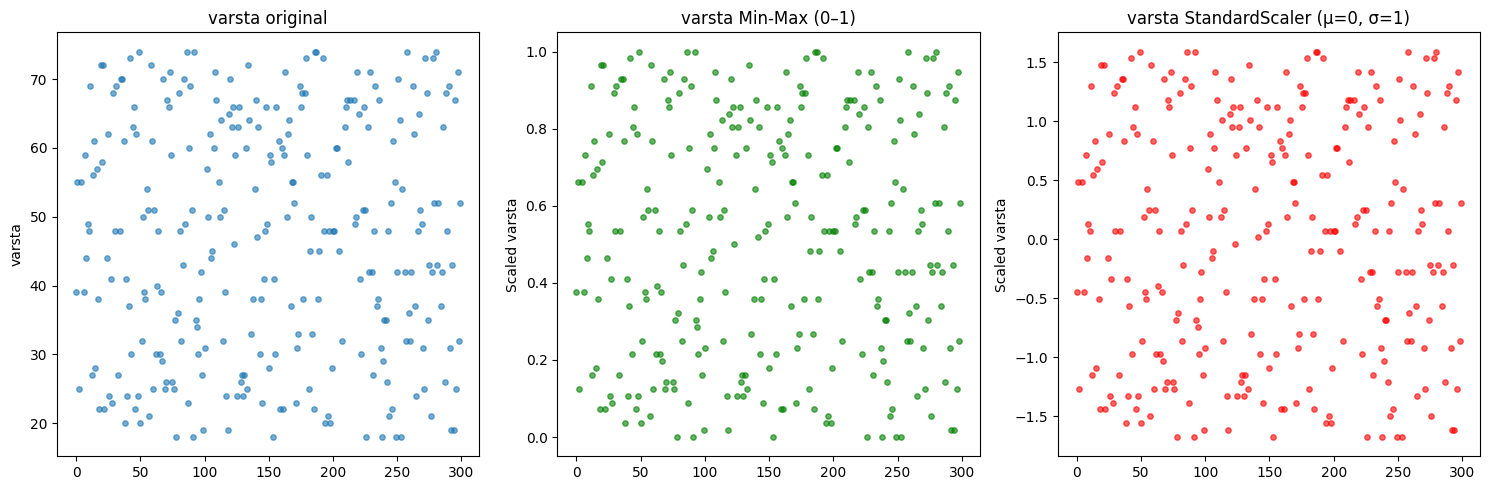

In [92]:
# scatter comparativ varsta
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(df_clean.index, df_clean["vârstă"], alpha=0.6, s=15)
plt.title("varsta original")
plt.ylabel("varsta")

plt.subplot(1,3,2)
plt.scatter(df_clean.index, df_clean["varsta_minmax"], alpha=0.6, s=15, color="green")
plt.title("varsta Min-Max (0–1)")
plt.ylabel("Scaled varsta")

plt.subplot(1,3,3)
plt.scatter(df_clean.index, df_clean["varsta_standard"], alpha=0.6, s=15, color="red")
plt.title("varsta StandardScaler (μ=0, σ=1)")
plt.ylabel("Scaled varsta")

plt.tight_layout()
plt.show()

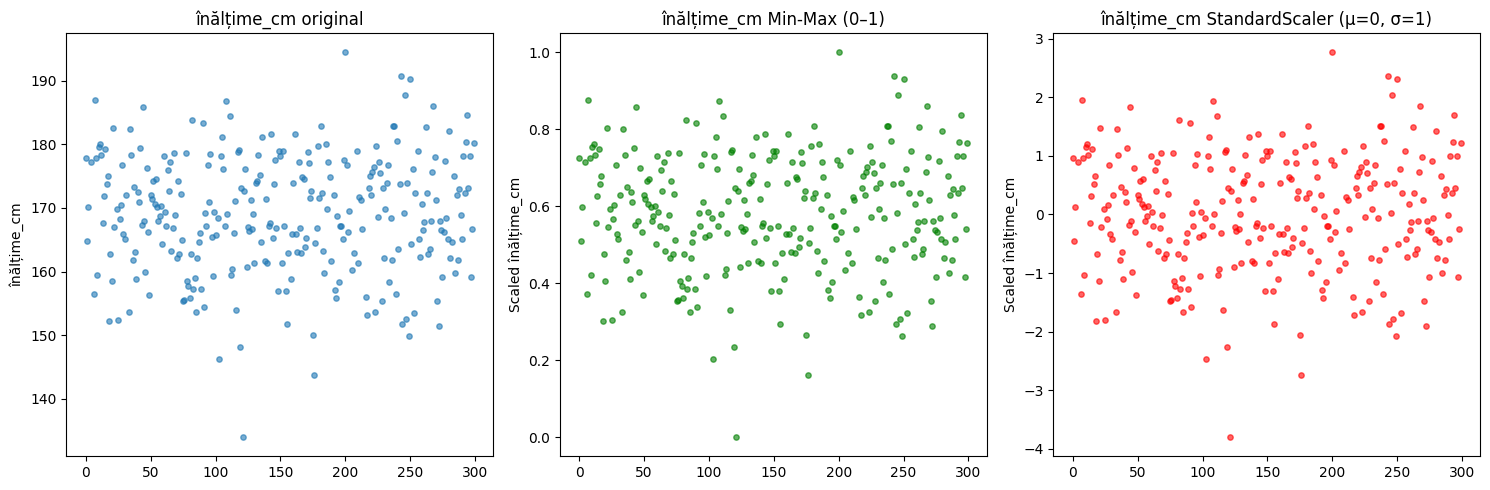

In [94]:
# scatter comparativ înălțime_cm
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(df_clean.index, df_clean["înălțime_cm"], alpha=0.6, s=15)
plt.title("înălțime_cm original")
plt.ylabel("înălțime_cm")

plt.subplot(1,3,2)
plt.scatter(df_clean.index, df_clean["înălțime_cm_minmax"], alpha=0.6, s=15, color="green")
plt.title("înălțime_cm Min-Max (0–1)")
plt.ylabel("Scaled înălțime_cm")

plt.subplot(1,3,3)
plt.scatter(df_clean.index, df_clean["înălțime_cm_standard"], alpha=0.6, s=15, color="red")
plt.title("înălțime_cm StandardScaler (μ=0, σ=1)")
plt.ylabel("Scaled înălțime_cm")

plt.tight_layout()
plt.show()

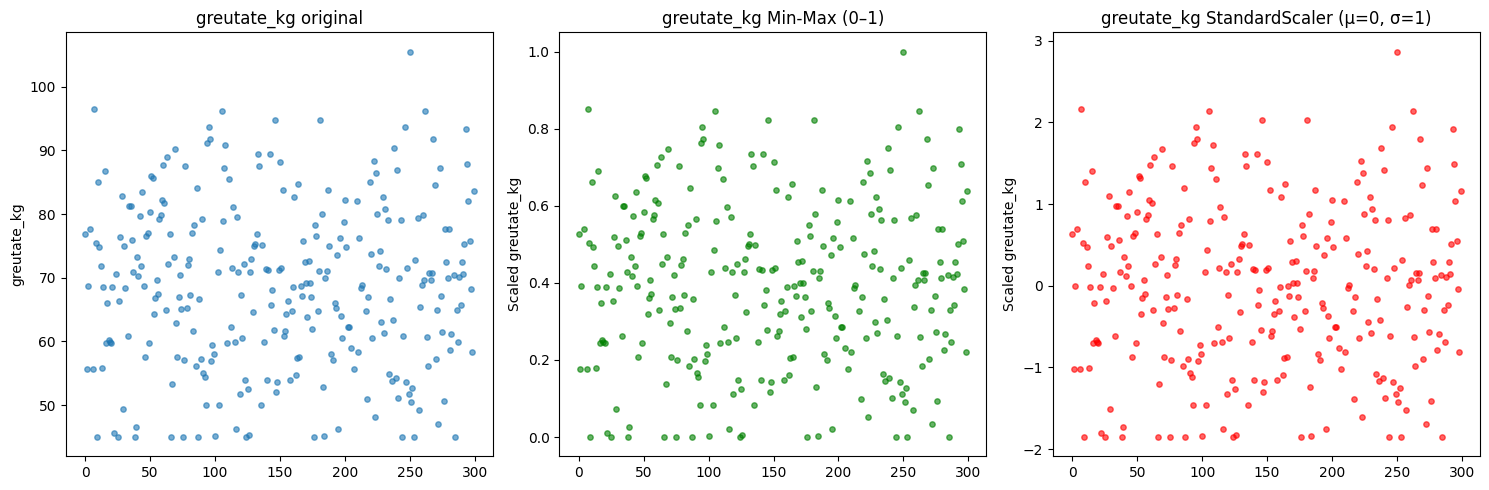

In [95]:
# scatter comparativ greutate_kg
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(df_clean.index, df_clean["greutate_kg"], alpha=0.6, s=15)
plt.title("greutate_kg original")
plt.ylabel("greutate_kg")

plt.subplot(1,3,2)
plt.scatter(df_clean.index, df_clean["greutate_kg_minmax"], alpha=0.6, s=15, color="green")
plt.title("greutate_kg Min-Max (0–1)")
plt.ylabel("Scaled greutate_kg")

plt.subplot(1,3,3)
plt.scatter(df_clean.index, df_clean["greutate_kg_standard"], alpha=0.6, s=15, color="red")
plt.title("greutate_kg StandardScaler (μ=0, σ=1)")
plt.ylabel("Scaled greutate_kg")

plt.tight_layout()
plt.show()

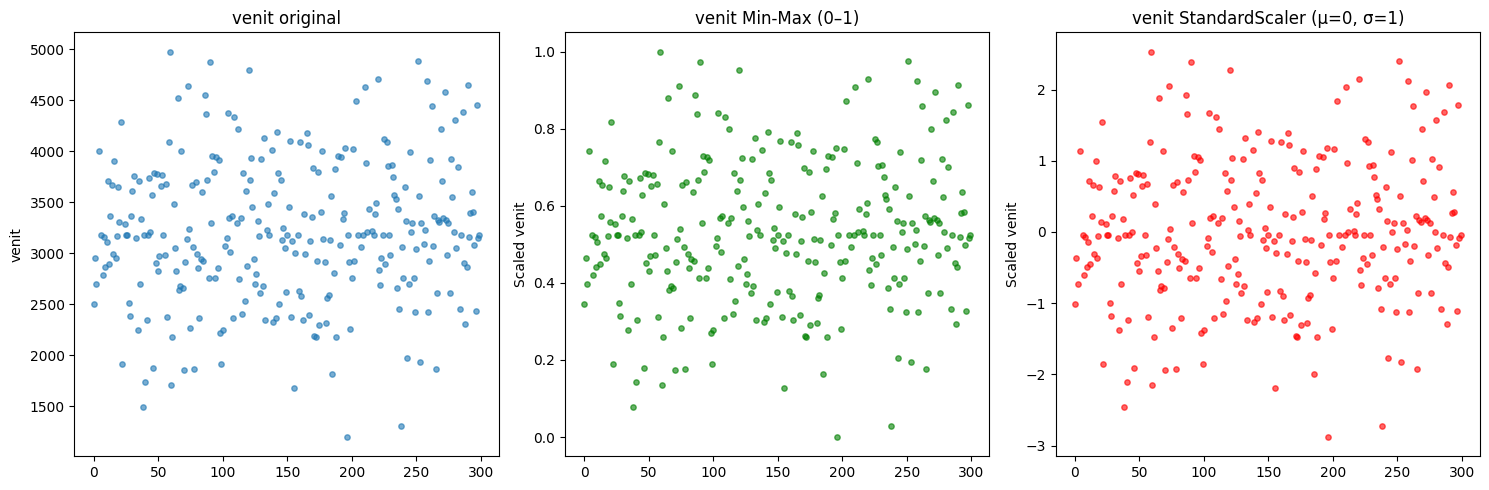

In [96]:
# scatter comparativ venit
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(df_clean.index, df_clean["venit"], alpha=0.6, s=15)
plt.title("venit original")
plt.ylabel("venit")

plt.subplot(1,3,2)
plt.scatter(df_clean.index, df_clean["venit_minmax"], alpha=0.6, s=15, color="green")
plt.title("venit Min-Max (0–1)")
plt.ylabel("Scaled venit")

plt.subplot(1,3,3)
plt.scatter(df_clean.index, df_clean["venit_standard"], alpha=0.6, s=15, color="red")
plt.title("venit StandardScaler (μ=0, σ=1)")
plt.ylabel("Scaled venit")

plt.tight_layout()
plt.show()

4. Au fost filtrate 16 inregistrari, un numar rezonabil pentru cele 300 de la inceput
In noul dataset nu mai avem valori NAN sau incoerente. Din distributiile de varsta, inaltime, greutata si venit se observa ca avem doar valori normale, fara prea multi outliers - maxim cate 1 sau 2 per coloana


In [101]:
#5

# Coloanele numerice de interes
cols_of_interest = ['vârstă', 'greutate_kg', 'înălțime_cm', 'venit']

# Calculăm corelația doar între aceste coloane
correlation_with_venit = df_clean[cols_of_interest].corr()['venit'].sort_values(ascending=False)

print("Corelația lui venit cu vârstă, greutate și înălțime:")
print(correlation_with_venit)


Corelația lui venit cu vârstă, greutate și înălțime:
venit          1.000000
vârstă         0.485374
greutate_kg    0.005283
înălțime_cm   -0.045878
Name: venit, dtype: float64


In [102]:
# Coloanele categorice de interes
categorical_cols_of_interest = ['gen', 'oraș', 'segment']

for col in categorical_cols_of_interest:
    print(f"\nVenit mediu pe {col}:")
    print(df_clean.groupby(col)['venit'].mean())



Venit mediu pe gen:
gen
female    3201.105590
male      3217.796748
Name: venit, dtype: float64

Venit mediu pe oraș:
oraș
bucuresti    3061.512500
cluj         3246.529412
timisoara    3293.047059
Name: venit, dtype: float64

Venit mediu pe segment:
segment
A    3363.919192
B    3186.934426
C    3005.285714
Name: venit, dtype: float64


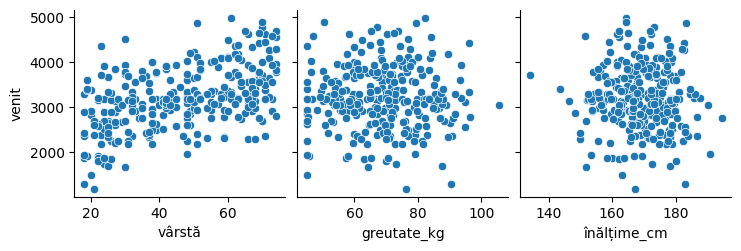

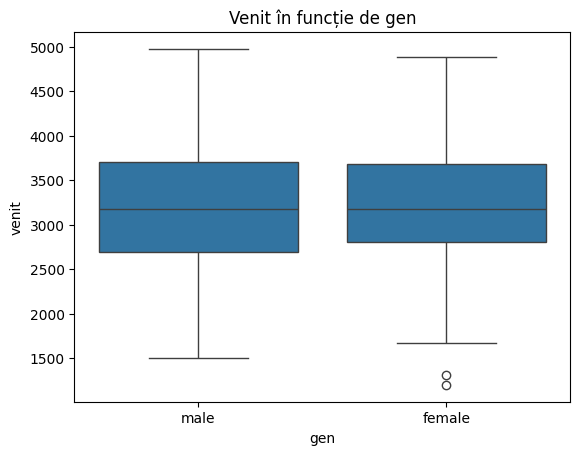

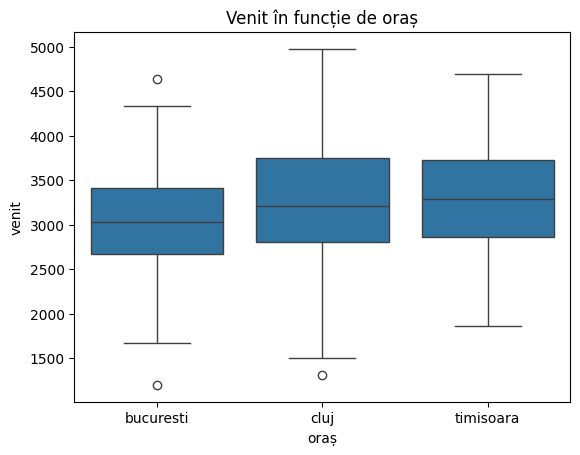

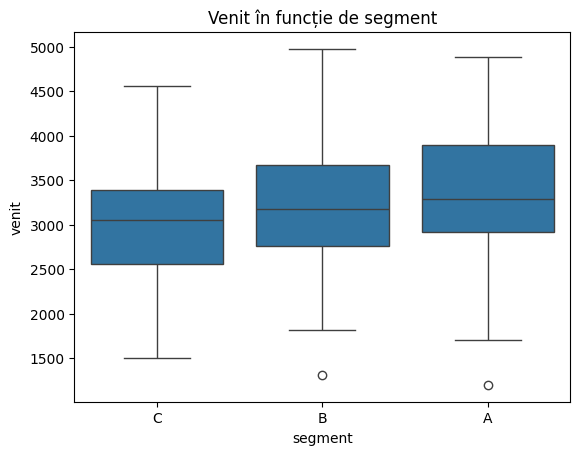

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Coloanele numerice de interes
cols_of_interest = ['vârstă', 'greutate_kg', 'înălțime_cm', 'venit']

# Pairplot pentru variabilele numerice
sns.pairplot(df_clean, x_vars=cols_of_interest[:-1], y_vars=['venit'], kind='scatter')
plt.show()

# Coloanele categorice de interes
categorical_cols_of_interest = ['gen', 'oraș', 'segment']

# Boxplot pentru variabilele categorice
for col in categorical_cols_of_interest:
    sns.boxplot(x=col, y='venit', data=df_clean)
    plt.title(f'Venit în funcție de {col}')
    plt.show()


Din noul set de date putem extrage mult mai usor corelatii intre venit si celelalte coloane
Avem o corelatie care arata ca odata cu varsta, venitul creste
Intre inaltime si venit sau intre greutate si venit nu este nici o corelatie puternica, ceea ce era de asteptat
Totodata, se observa si celelate distributii in functie de coloanele categorice